# DSCI 619 - Deep Learning, Project 5

### *Jeffery Boczkaja*

## 1. Load the Dataset

In [1]:
import pandas as pd
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# 2. Please concatenate the Title, Review Text, Division Name, Department Name, and Class Name as a new feature of Reviews.

In [4]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [5]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

### Fill the nulls with space

In [6]:
df[['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']] = df[['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']].fillna('')

In [7]:
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

### Concatenate the columns

In [8]:
df['Reviews'] = df['Title'] + " " + df['Review Text'] + " " + df['Division Name'] + " " + df['Department Name'] + " " + df['Class Name']

In [9]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Reviews
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


# 3. Please clean the new feature of Reviews using regular expressions.

In [10]:
# Remove all special characters, punctuation and spaces
df['Reviews'] = df['Reviews'].apply(lambda x: re.sub(r'[^A-Za-z0-9]+',' ',x))
# Replace special characters,
,  in the file
df['Reviews'] = df['Reviews'].apply(lambda x: re.sub(r"<br />", " ", x))
# Remove length <=2
df['Reviews'] = df['Reviews'].apply(lambda x: re.sub(r'\b[a-zA-Z]{1,2}\b', '', x))

In [11]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Reviews
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful silky and sexy and comfo...
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress sooo pretty happened find...
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws had such high hopes f...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,favorite buy love love love this jumpsuit ...
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt very flattering ...


### Split the data into training and test sets

In [12]:
X = df['Reviews'].values
y = df['Recommended IND'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.5)

### Convert text to numerical values

In [13]:
# Specify the vocab size
VOCAB_SIZE = 1000
# Perform textvectorization
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)

# Fits the state of the preprocessing layer to the dataset.
encoder.adapt(X_train)

In [14]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'this', 'general', 'but', 'for',
       'dresses', 'with', 'was', 'dress', 'tops', 'not', 'love', 'petite',
       'that', 'size', 'very', 'top'], dtype='<U13')

# 4. Build an RNN model to forecast the Recommended IND based on Reviews using TensorFlow.

### Create the model

In [15]:
model = tf.keras.Sequential([
    # Convert review text to indices
    encoder, 
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    # 
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    # Binary classifier
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

### Configure the model

In [16]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

### Train the RNN Model

In [17]:
%%time
history = model.fit(x=X_train,y=y_train,batch_size= 32,epochs=300,
          validation_data=(X_test,y_test), verbose= 1
          )

Epoch 1/300
588/588 [==============================] - 104s 151ms/step - loss: 0.3508 - accuracy: 0.8074 - val_loss: 0.2190 - val_accuracy: 0.9063
Epoch 2/300
588/588 [==============================] - 88s 150ms/step - loss: 0.2161 - accuracy: 0.9045 - val_loss: 0.2069 - val_accuracy: 0.9100
Epoch 3/300
588/588 [==============================] - 94s 160ms/step - loss: 0.1986 - accuracy: 0.9132 - val_loss: 0.2088 - val_accuracy: 0.9170
Epoch 4/300
588/588 [==============================] - 89s 152ms/step - loss: 0.1918 - accuracy: 0.9170 - val_loss: 0.2079 - val_accuracy: 0.9144
Epoch 5/300
588/588 [==============================] - 89s 152ms/step - loss: 0.1881 - accuracy: 0.9199 - val_loss: 0.2093 - val_accuracy: 0.9129
Epoch 6/300
588/588 [==============================] - 91s 155ms/step - loss: 0.1850 - accuracy: 0.9198 - val_loss: 0.2086 - val_accuracy: 0.9115
Epoch 7/300
588/588 [==============================] - 91s 155ms/step - loss: 0.1836 - accuracy: 0.9210 - val_loss: 0.2103 

Epoch 57/300
588/588 [==============================] - 90s 153ms/step - loss: 0.0542 - accuracy: 0.9754 - val_loss: 0.7246 - val_accuracy: 0.8885
Epoch 58/300
588/588 [==============================] - 89s 151ms/step - loss: 0.0478 - accuracy: 0.9774 - val_loss: 0.7929 - val_accuracy: 0.8880
Epoch 59/300
588/588 [==============================] - 90s 152ms/step - loss: 0.0479 - accuracy: 0.9779 - val_loss: 0.7351 - val_accuracy: 0.8874
Epoch 60/300
588/588 [==============================] - 90s 152ms/step - loss: 0.0504 - accuracy: 0.9766 - val_loss: 0.8000 - val_accuracy: 0.8891
Epoch 61/300
588/588 [==============================] - 89s 152ms/step - loss: 0.0426 - accuracy: 0.9794 - val_loss: 0.8346 - val_accuracy: 0.8876
Epoch 62/300
588/588 [==============================] - 89s 151ms/step - loss: 0.0439 - accuracy: 0.9784 - val_loss: 0.8918 - val_accuracy: 0.8857
Epoch 63/300
588/588 [==============================] - 90s 153ms/step - loss: 0.0475 - accuracy: 0.9775 - val_loss: 0

588/588 [==============================] - 100s 170ms/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 1.5631 - val_accuracy: 0.8848
Epoch 168/300
588/588 [==============================] - 90s 154ms/step - loss: 0.0325 - accuracy: 0.9919 - val_loss: 1.1558 - val_accuracy: 0.8748
Epoch 169/300
588/588 [==============================] - 91s 154ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 1.2457 - val_accuracy: 0.8844
Epoch 170/300
588/588 [==============================] - 95s 162ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 1.2508 - val_accuracy: 0.8808
Epoch 171/300
588/588 [==============================] - 95s 161ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 1.2947 - val_accuracy: 0.8844
Epoch 172/300
588/588 [==============================] - 96s 164ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 1.3270 - val_accuracy: 0.8863
Epoch 173/300
588/588 [==============================] - 93s 157ms/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 1.3544 

588/588 [==============================] - 88s 149ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 1.2664 - val_accuracy: 0.8861
Epoch 278/300
588/588 [==============================] - 148s 251ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 1.3103 - val_accuracy: 0.8861
Epoch 279/300
588/588 [==============================] - 147s 250ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 1.3355 - val_accuracy: 0.8851
Epoch 280/300
588/588 [==============================] - 149s 253ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 1.3496 - val_accuracy: 0.8846
Epoch 281/300
588/588 [==============================] - 147s 250ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 1.3760 - val_accuracy: 0.8851
Epoch 282/300
588/588 [==============================] - 147s 250ms/step - loss: 0.0098 - accuracy: 0.9970 - val_loss: 1.3985 - val_accuracy: 0.8857
Epoch 283/300
588/588 [==============================] - 145s 247ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 1.

# 5. Evaluate the model and check the model fit. 

### Model Diagnostics

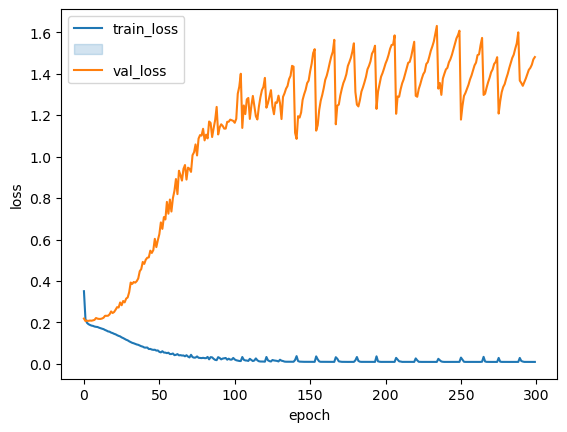

In [23]:
## Evaluate the Model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
# Plot train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
# Add legends
plt.legend(labels=['train_loss', '', 'val_loss'])

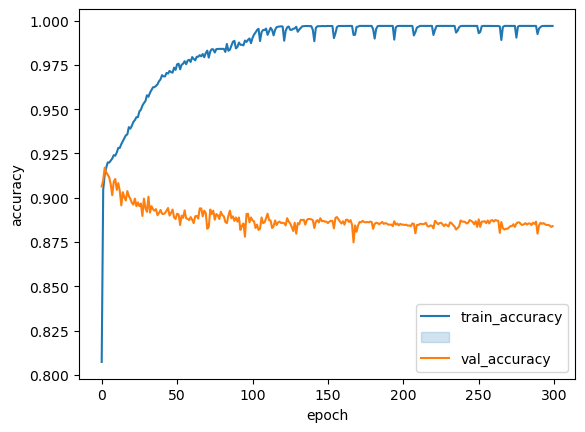

In [24]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
# Add legends
plt.legend(labels=['train_accuracy', '', 'val_accuracy'])

### Evaluate the RNN Model on the test data

In [20]:
# the cutoff probability is 50%
y_pred = (model.predict(X_test)> 0.5).astype(int)

147/147 [==============================] - 12s 41ms/step


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 563,  272],
       [ 273, 3590]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
label_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=label_names))

              precision    recall  f1-score   support

    negative       0.67      0.67      0.67       835
    positive       0.93      0.93      0.93      3863

    accuracy                           0.88      4698
   macro avg       0.80      0.80      0.80      4698
weighted avg       0.88      0.88      0.88      4698



### Do we recommend this model?

We would recommend this model. It has a good accuracy and f1-score, we are at 88%. The only thing to be wary of is the model is better at predicting positive reviews over negative reviews.